# Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read The Data

In [2]:
healthcare_dataframe = pd.read_csv('/content/drive/MyDrive/Data_For_Analysis/healthcare-dataset-stroke-data.csv')
df = healthcare_dataframe.copy()
df.head(4)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


# Info & Describe to see information about the data, check duplicate, check missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Insights:
## there is missing data in bmi column we will see how we can fill them later
## there is few skewness by looking to mean and median
## no duplicated records

## Then We Will split categorical and numarical Features

In [7]:
df_numerical_features = df.select_dtypes(include='number')
df_numerical_features.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

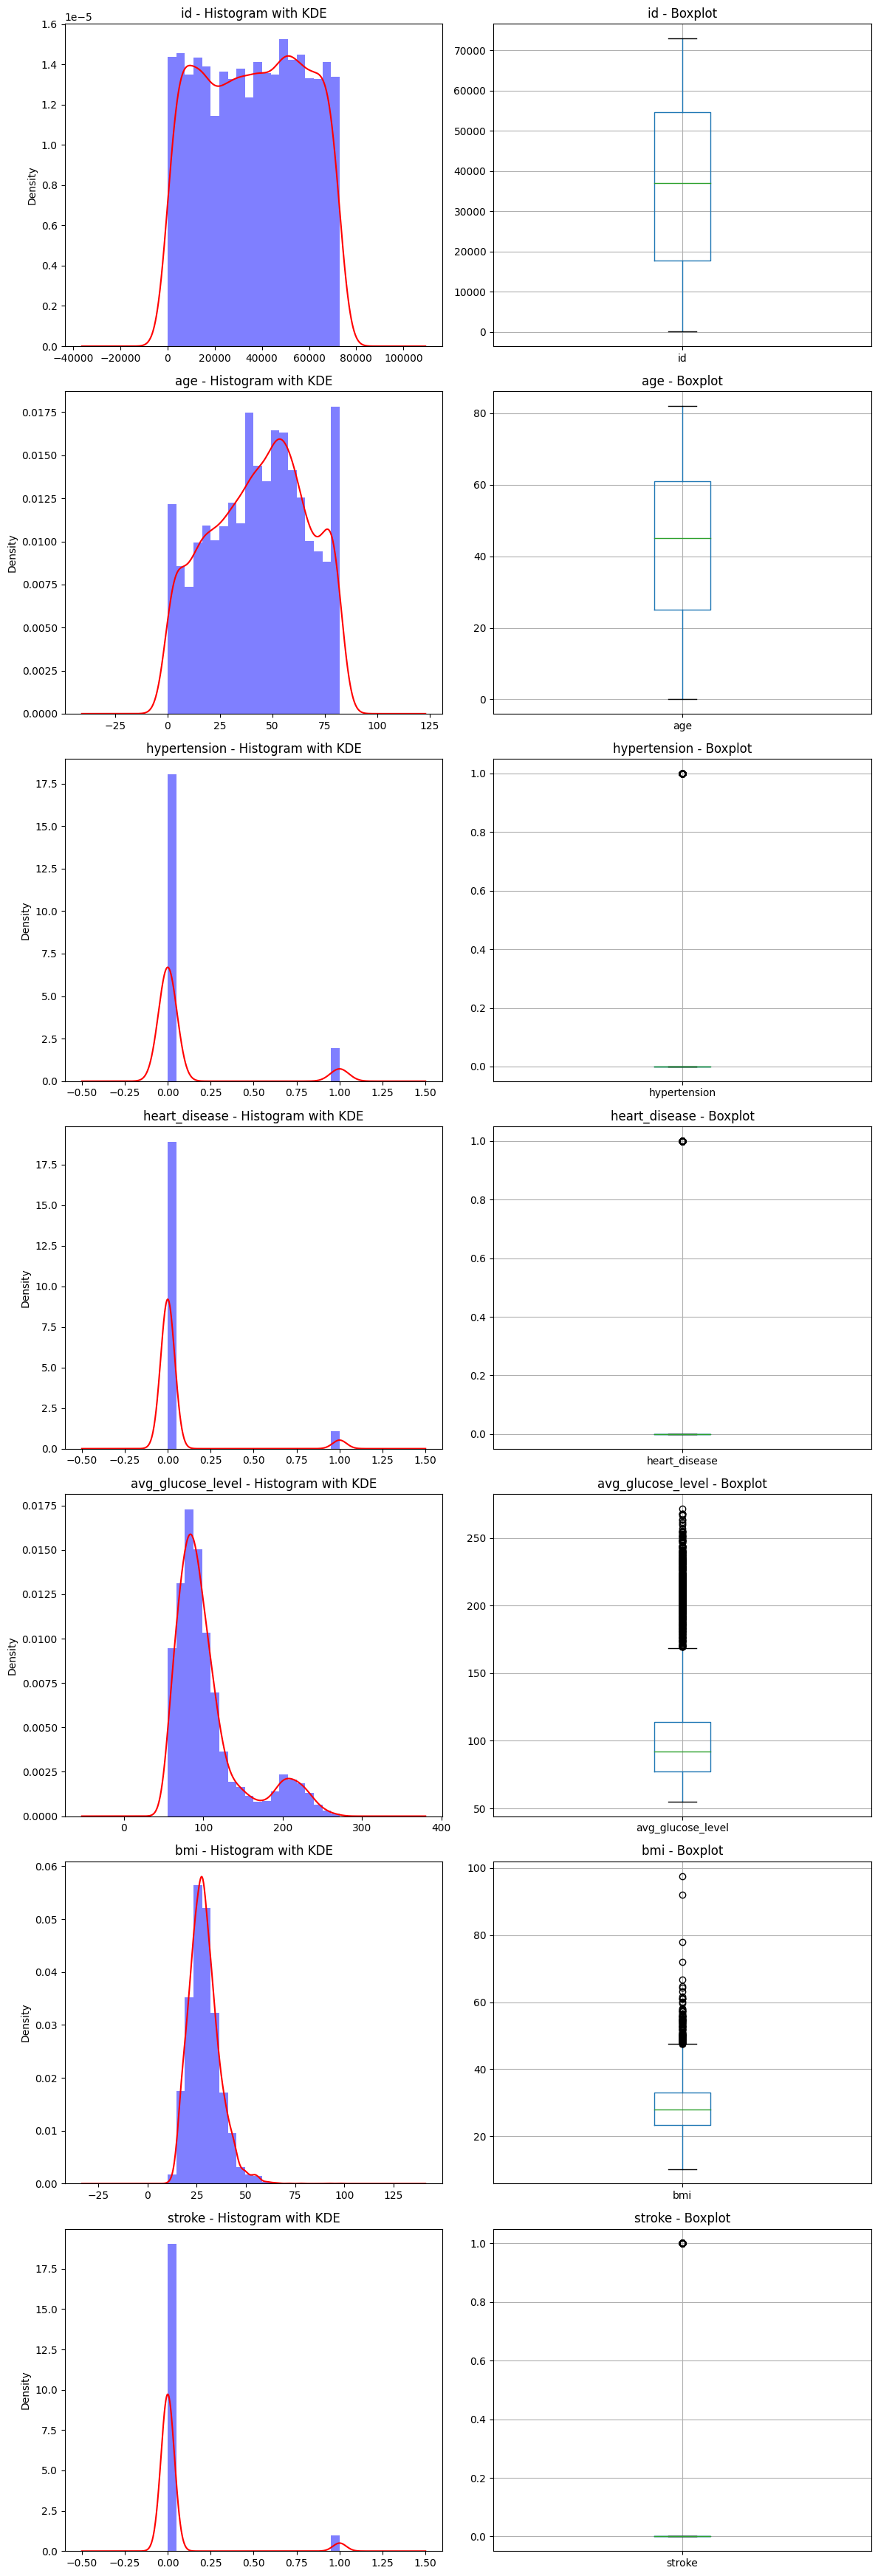

In [8]:
# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df_numerical_features.columns), 2, figsize=(12, 5 * len(df_numerical_features.columns)))

for i, col in enumerate(df_numerical_features.columns):
    # Histogram with KDE
    df_numerical_features[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df_numerical_features[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # Boxplot
    df_numerical_features.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

## Insights:
## there are outliers in avg_glucose_level, bmi columns
## these columns hypertension, heart_disease, stroke are categorical data based on plot and value_counts() function there are only two values
## we can drop id column


In [9]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

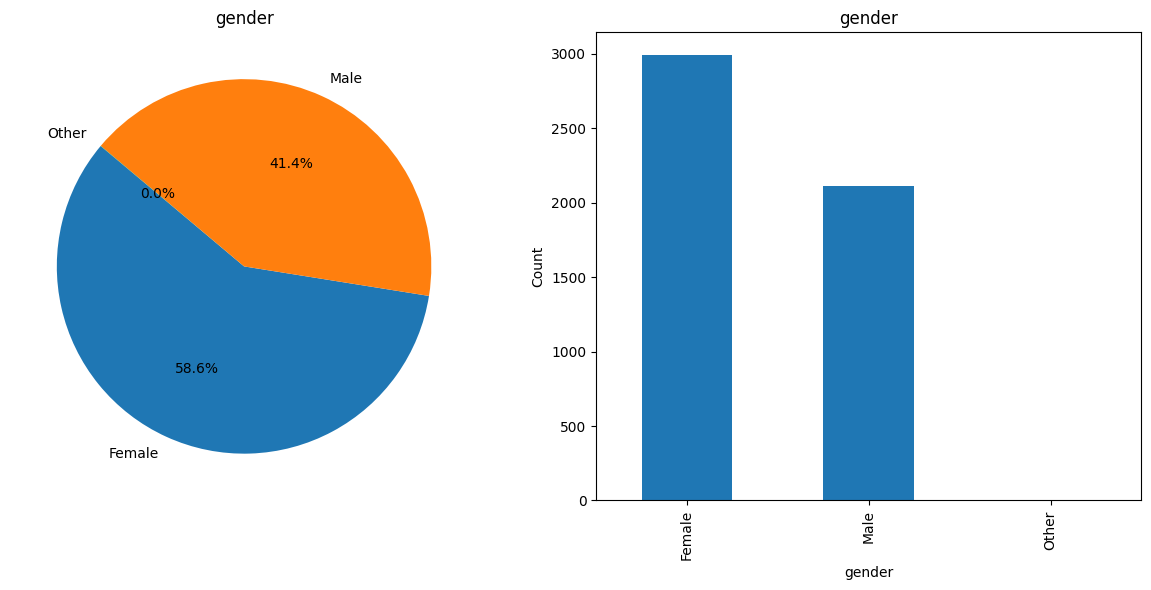

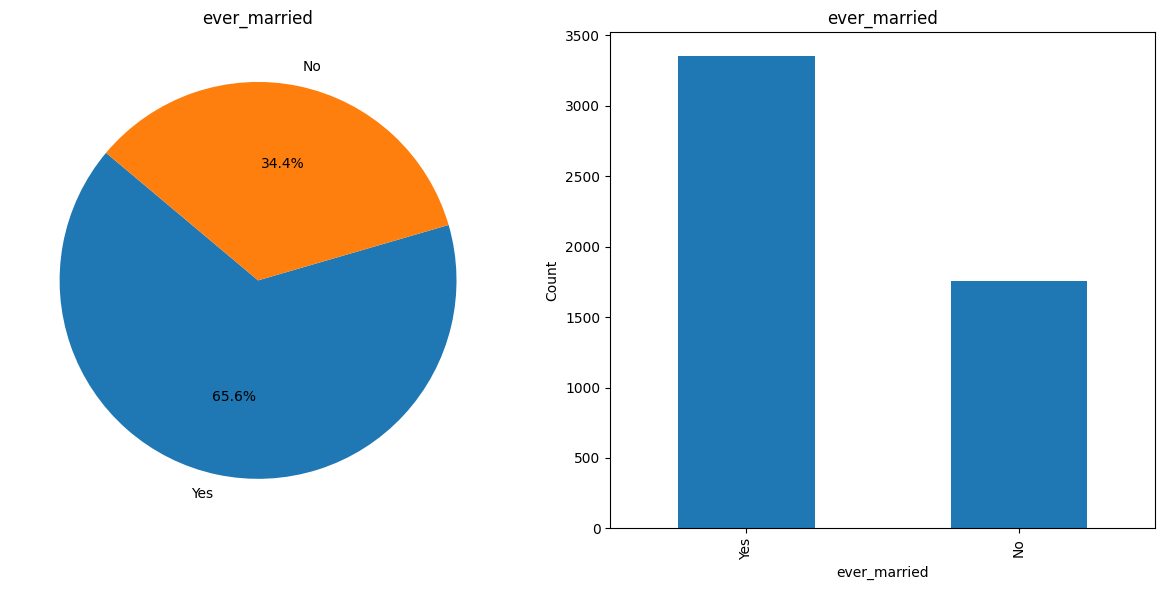

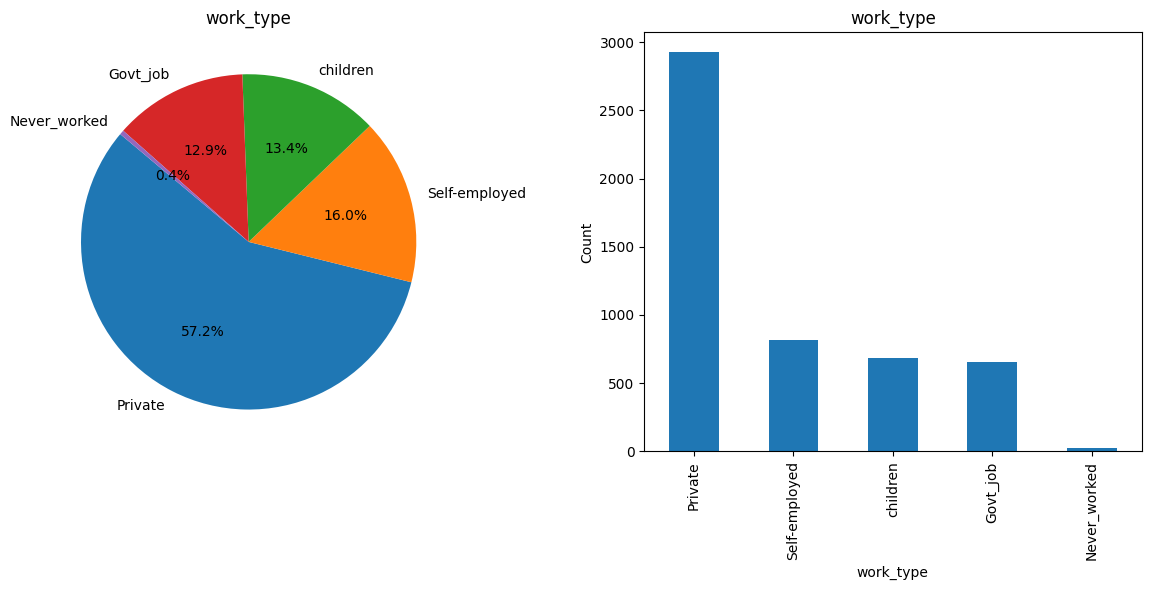

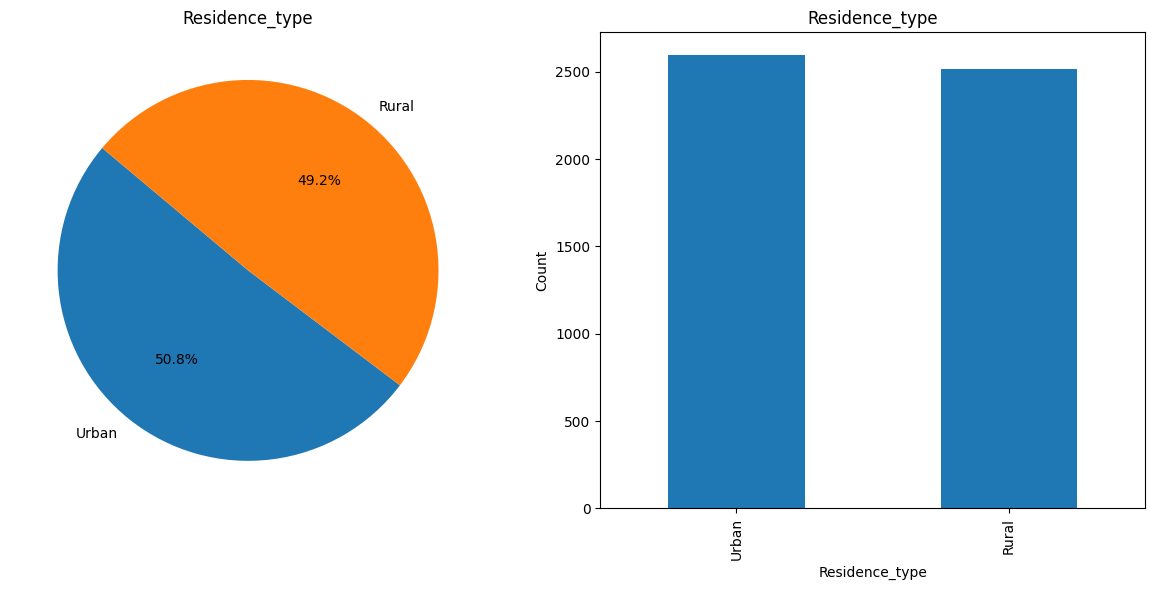

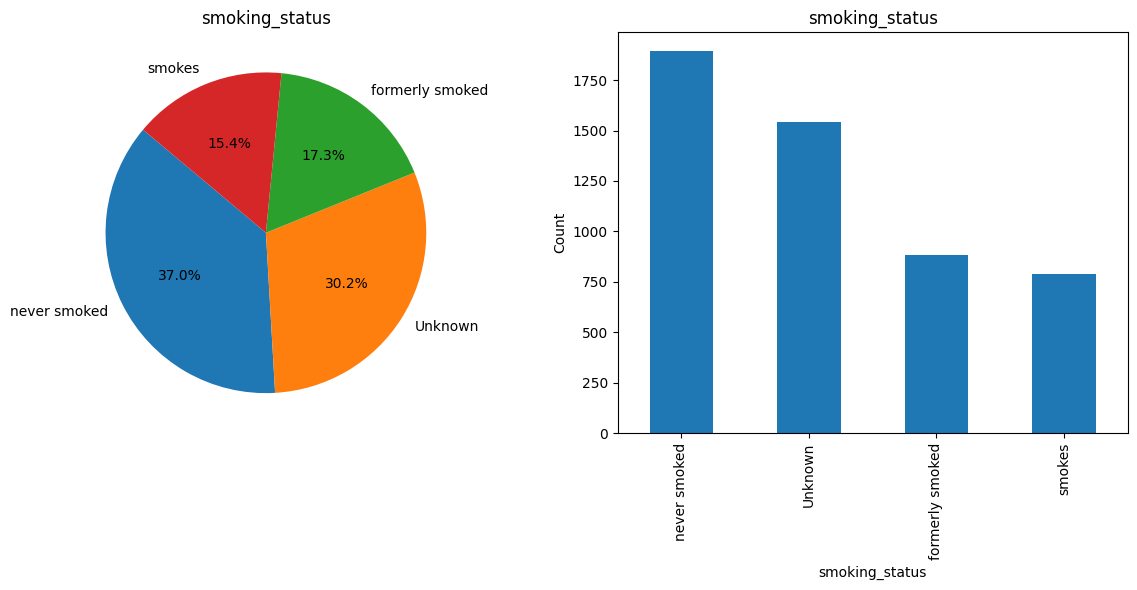

In [10]:
for i in df_categorical_features.columns:
  counts = df_categorical_features[i].value_counts()

  # Plotting
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Pie chart
  axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
  axes[0].set_title(i)

  # Bar chart
  counts.plot(kind='bar', ax=axes[1])
  axes[1].set_title(i)
  axes[1].set_ylabel('Count')
  axes[1].set_xlabel(i)

  plt.tight_layout()
  plt.show()

In [11]:
df_cat = df[['hypertension', 'heart_disease', 'stroke']]
df_cat.head()

,hypertension,heart_disease,stroke
0,0,1,1
1,0,0,1
2,0,1,1
3,0,0,1
4,1,0,1


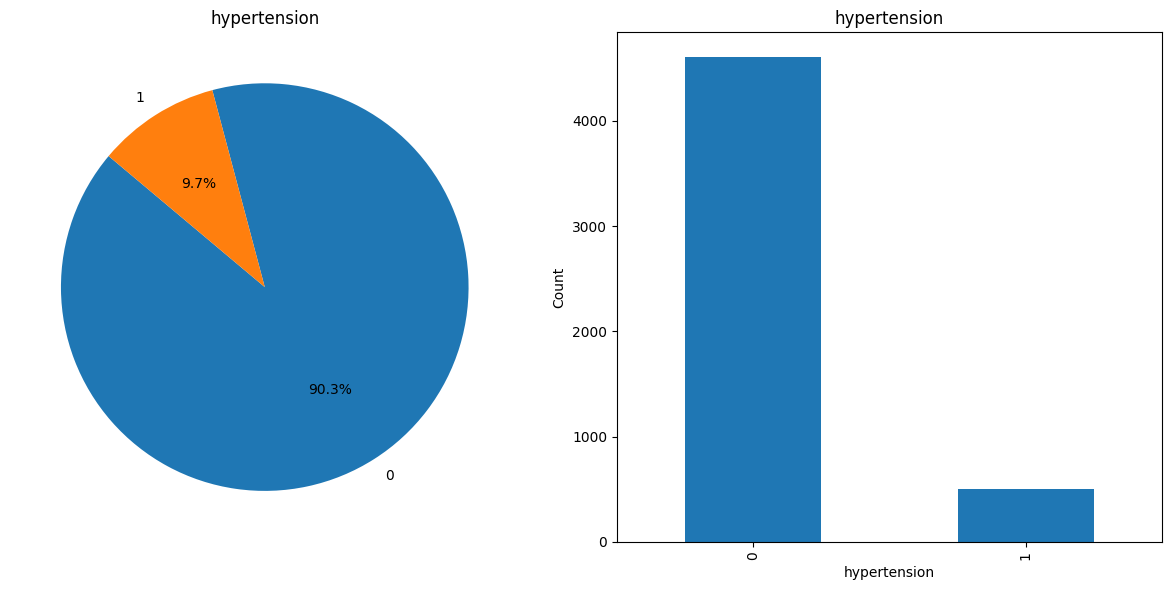

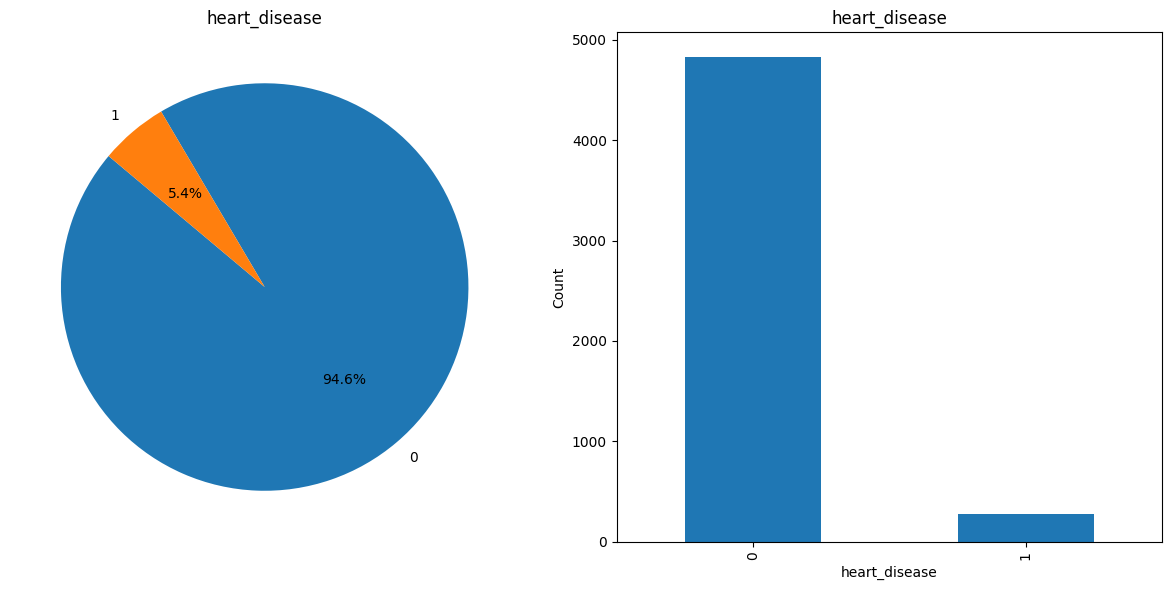

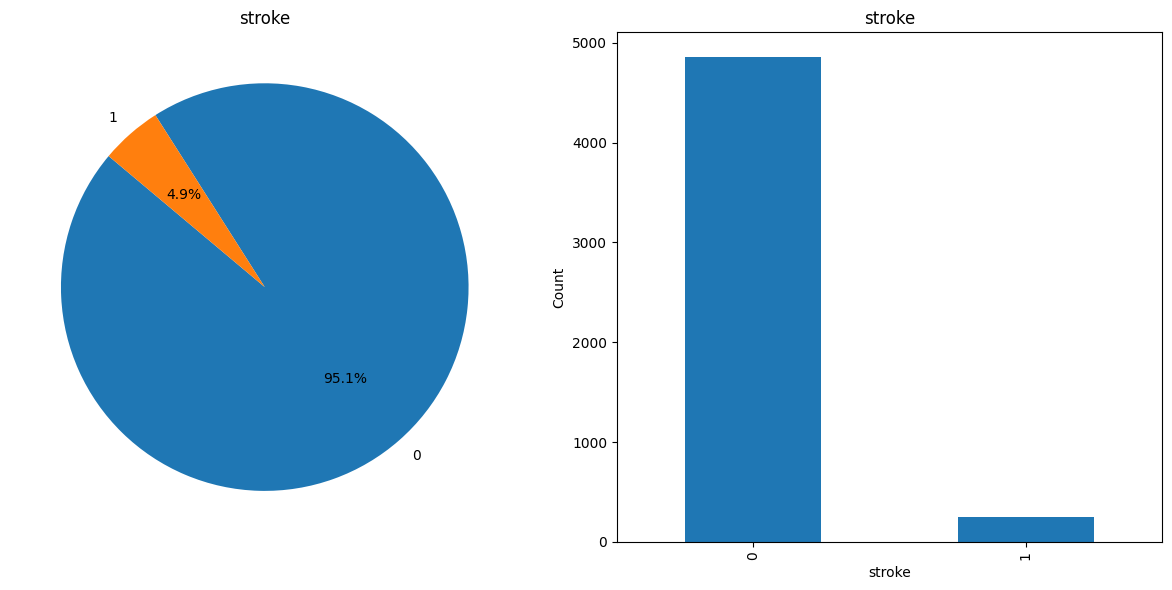

In [12]:
for i in df_cat.columns:
  counts = df_cat[i].value_counts()

  # Plotting
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Pie chart
  axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
  axes[0].set_title(i)

  # Bar chart
  counts.plot(kind='bar', ax=axes[1])
  axes[1].set_title(i)
  axes[1].set_ylabel('Count')
  axes[1].set_xlabel(i)

  plt.tight_layout()
  plt.show()

## Dealing with the categorical Data
## Label encoding

In [13]:
df_categorical_features.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [14]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in columns.
for i in range(df_categorical_features.shape[1]):
  df_categorical_features.iloc[:,i] = label_encoder.fit_transform(df_categorical_features.iloc[:,i])

<ipython-input-14-f59448defbc8>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_categorical_features.iloc[:,i] = label_encoder.fit_transform(df_categorical_features.iloc[:,i])
<ipython-input-14-f59448defbc8>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_categorical_features.iloc[:,i] = label_encoder.fit_transform(df_categorical_features.iloc[:,i])
<ipython-input-14-f59448defbc8>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To ret

In [15]:
df_categorical_features.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2


In [16]:
# concatenating df_categorical_features and df_cat along columns
df_cat_features = pd.concat([df_categorical_features, df_cat], axis=1)
df_cat_features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
0,1,1,2,1,1,0,1,1
1,0,1,3,0,2,0,0,1
2,1,1,2,0,2,0,1,1
3,0,1,2,1,3,0,0,1
4,0,1,3,0,2,1,0,1


In [17]:
df_num_features = df_numerical_features[['age', 'avg_glucose_level','bmi']]
df_num_features.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0


In [18]:
# concatenating df_num_features and df_cat_features along columns
df_all_features = pd.concat([df_num_features, df_cat_features], axis=1)
df_all_features.head()

,age,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
0,67.0,228.69,36.6,1,1,2,1,1,0,1,1
1,61.0,202.21,NaN,0,1,3,0,2,0,0,1
2,80.0,105.92,32.5,1,1,2,0,2,0,1,1
3,49.0,171.23,34.4,0,1,2,1,3,0,0,1
4,79.0,174.12,24.0,0,1,3,0,2,1,0,1


##<font color='black'>**After That We Will Compute The Correlation Between Numeric Features And Plot The Heatmap Between Them**</font>![confusion_matrix.png](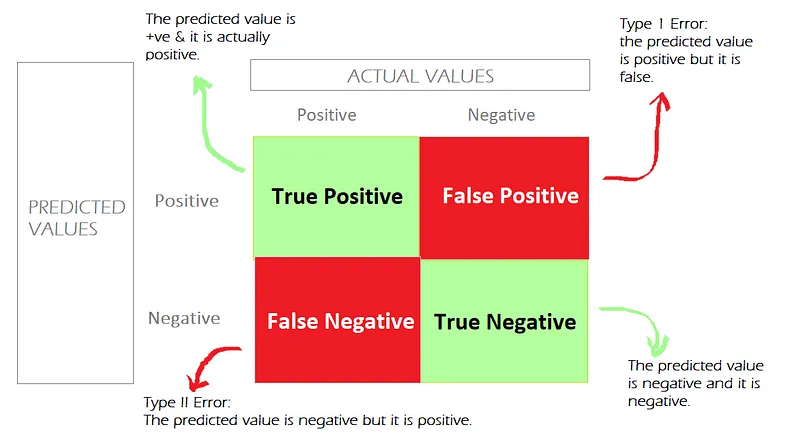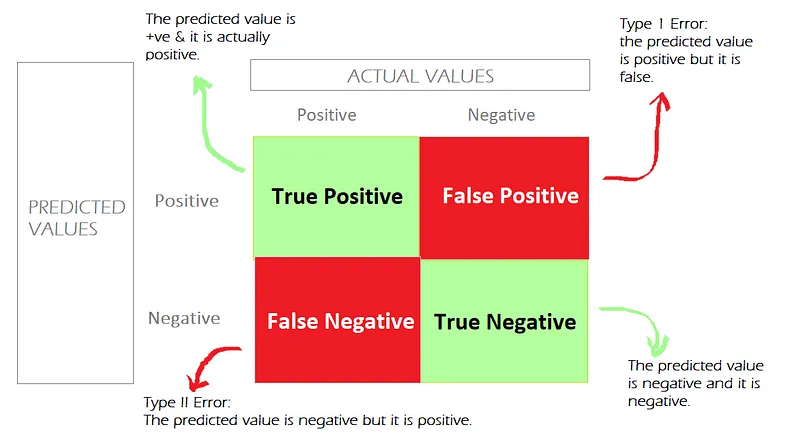)

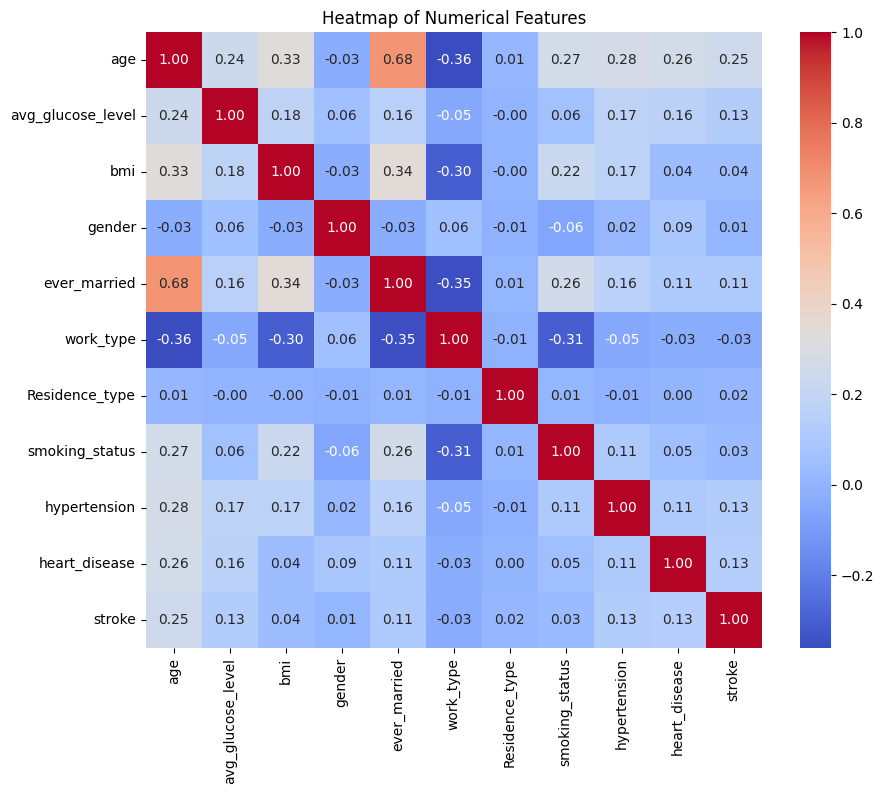

In [19]:
corr = df_all_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

##<font color='green'>**here we see high correlation between age and ever_married but here we look if the person if stroke or not depend on some features so the problem is classification under supervises learning because we have labels**</font>

<Axes: xlabel='gender', ylabel='count'>

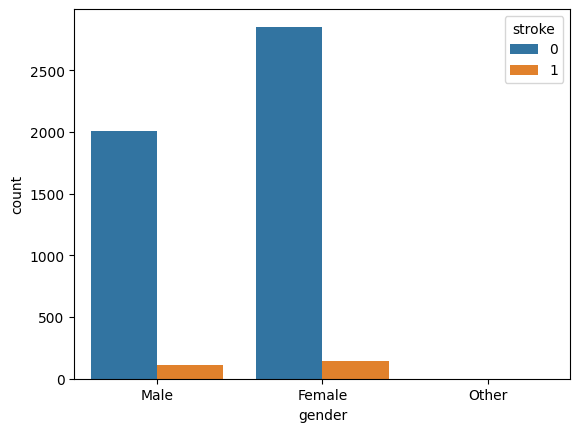

In [20]:
sns.countplot(df, x="gender", hue="stroke")

## count for male and female with stroke

<Axes: xlabel='age', ylabel='avg_glucose_level'>

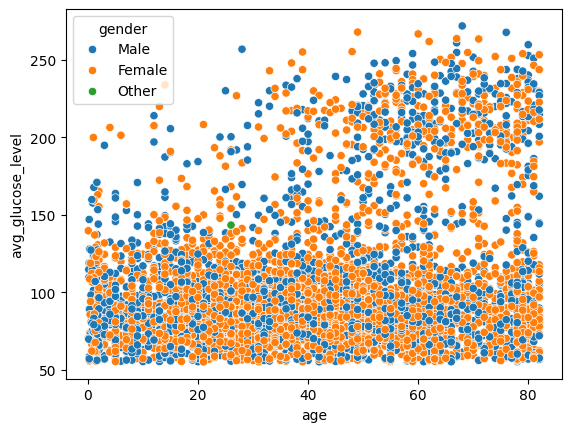

In [21]:
sns.scatterplot(data=df, x="age", y="avg_glucose_level", hue='gender')

## relation between age and avg_glucose_level depends on gender to  see the  visual semantics

<Axes: xlabel='age', ylabel='bmi'>

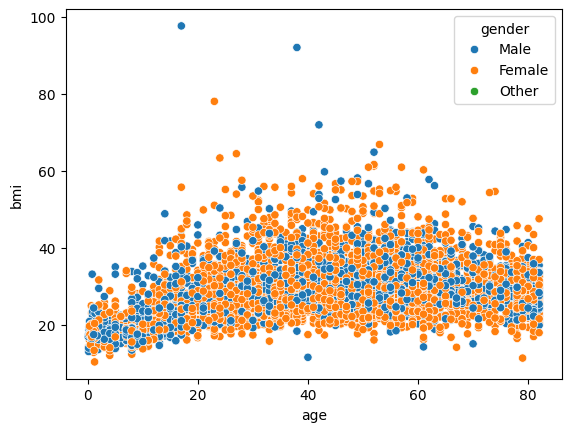

In [22]:
sns.scatterplot(data=df, x="age", y="bmi", hue='gender')

## relation between age and bmi depends on gender to  see the  visual semantics

# We will determine the features and the target of our data

In [23]:
X = df_all_features.drop('stroke', axis=1)
y = df_all_features['stroke']

In [24]:
from sklearn.model_selection import train_test_split
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## then we will fill the missing data

In [25]:
X_train.isnull().sum()

age                    0
avg_glucose_level      0
bmi                  156
gender                 0
ever_married           0
work_type              0
Residence_type         0
smoking_status         0
hypertension           0
heart_disease          0
dtype: int64

In [26]:
#we will fill by median because there are outliers
X_train['bmi'].fillna(X_train['bmi'].median(), inplace=True)

In [27]:
X_train.isnull().sum()

age                  0
avg_glucose_level    0
bmi                  0
gender               0
ever_married         0
work_type            0
Residence_type       0
smoking_status       0
hypertension         0
heart_disease        0
dtype: int64

In [28]:
y_train.isnull().sum()

0

In [29]:
X_test.isnull().sum()

age                   0
avg_glucose_level     0
bmi                  45
gender                0
ever_married          0
work_type             0
Residence_type        0
smoking_status        0
hypertension          0
heart_disease         0
dtype: int64

In [30]:
#we will fill by median because there are outliers
X_test['bmi'].fillna(X_test['bmi'].median(), inplace=True)

In [31]:
X_test.isnull().sum()

age                  0
avg_glucose_level    0
bmi                  0
gender               0
ever_married         0
work_type            0
Residence_type       0
smoking_status       0
hypertension         0
heart_disease        0
dtype: int64

In [32]:
y_test.isnull().sum()

0

## scale the x_train set

In [33]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler because there is outliers
scaler = preprocessing.MinMaxScaler()
# here we pass X_train as parameter
d = scaler.fit_transform(X_train)
X_train = pd.DataFrame(d, columns=X_train.columns)
X_train.head()

,age,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease
0,0.963343,0.265534,0.208477,1.0,1.0,0.75,0.0,0.333333,0.0,0.0
1,0.755621,0.153264,0.297824,0.0,1.0,0.50,1.0,0.000000,0.0,0.0
2,0.254643,0.020312,0.268041,0.0,0.0,0.50,0.0,0.666667,0.0,0.0
3,0.376833,0.048841,0.230241,1.0,1.0,0.00,1.0,0.333333,0.0,0.0
4,0.376833,0.020820,0.109966,0.0,0.0,0.50,0.0,0.666667,0.0,0.0


## scale the x_test set

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
# here we pass X_test as parameter
d = scaler.fit_transform(X_test)
X_test = pd.DataFrame(d, columns=X_test.columns)
X_test.head()

,age,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease
0,0.377441,0.045515,0.190397,0.5,0.0,0.75,0.0,0.000000,0.0,0.0
1,0.487305,0.047597,0.278146,0.5,1.0,0.75,0.0,0.666667,0.0,0.0
2,0.096680,0.090793,0.182119,0.0,0.0,1.00,1.0,0.000000,0.0,0.0
3,0.963379,0.101296,0.132450,0.0,1.0,0.75,0.0,0.666667,1.0,0.0
4,0.914551,0.187074,0.259934,0.0,1.0,0.00,0.0,0.666667,0.0,0.0


## Train the models and we will start simple

## LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# Make predictions
lr_pred = lr_model.predict(X_test)
# Evaluate models
accuracy = accuracy_score(y_test, lr_pred)
classification_rep = classification_report(y_test, lr_pred)
confusion_mat = confusion_matrix(y_test, lr_pred)
print("Model: Logistic Regression")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")
print("-" * 75)


Model: Logistic Regression
Accuracy: 0.9393346379647749
Confusion Matrix:
[[960   0]
 [ 62   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

---------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Here if we say the person has no stroke (predicted value) but he is stroke so it a problem and this is FP (false positive) and we should redure it and we will look at precision in the 0 line and it is good.....also if we say that the person has stroke but he don't have stroke it is okay because he will make check and also we can look for f1 score for both situation

[condusion matrix](https://miro.medium.com/v2/resize:fit:786/format:webp/1*rljt9IovDNz-pmvNNVOaDQ.png)

[Article about confusion matrix](https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/)

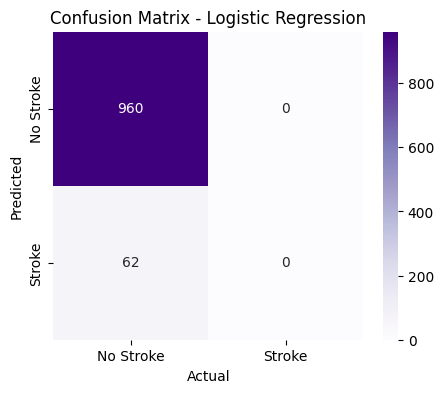

In [36]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Purples", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix - Logistic Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Support vector classifier

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train Support Vector Classifier (SVC) model
svc_model = SVC()
svc_model.fit(X_train, y_train)
# Make predictions
svc_pred = svc_model.predict(X_test)
# Evaluate models
accuracy = accuracy_score(y_test, svc_pred)
classification_rep = classification_report(y_test, svc_pred)
confusion_mat = confusion_matrix(y_test, svc_pred)
print(f"Model: Support vector classifier")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")
print("-" * 75)


Model: Support vector classifier
Accuracy: 0.9393346379647749
Confusion Matrix:
[[960   0]
 [ 62   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

---------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


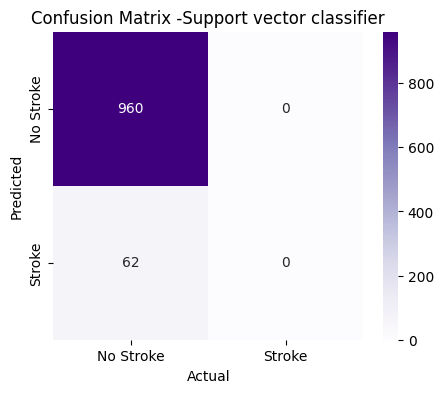

In [38]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Purples", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix -Support vector classifier')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
# Make predictions
dt_pred = dt_model.predict(X_test)
# Evaluate models
accuracy = accuracy_score(y_test, dt_pred)
classification_rep = classification_report(y_test, dt_pred)
confusion_mat = confusion_matrix(y_test, dt_pred)
print(f"Model:Decision Tree Classifier")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")
print("-" * 75)

Model:Decision Tree Classifier
Accuracy: 0.9060665362035225
Confusion Matrix:
[[916  44]
 [ 52  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.19      0.16      0.17        62

    accuracy                           0.91      1022
   macro avg       0.57      0.56      0.56      1022
weighted avg       0.90      0.91      0.90      1022

---------------------------------------------------------------------------


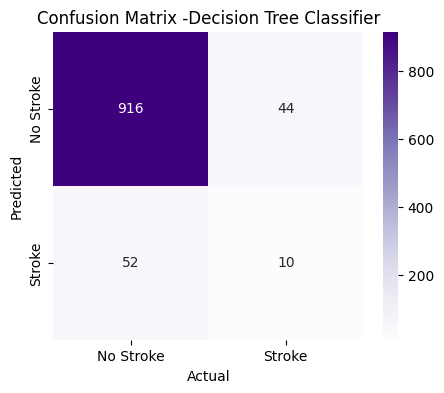

In [40]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Purples", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix -Decision Tree Classifier')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## KNeighborsClassifier (KNN Classifier)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train k-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
# Make predictions
knn_pred = knn_model.predict(X_test)
# Evaluate models
accuracy = accuracy_score(y_test, knn_pred)
classification_rep = classification_report(y_test, knn_pred)
confusion_mat = confusion_matrix(y_test, knn_pred)
print("Model:  k-Nearest Neighbors")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")
print("-" * 75)

Model:  k-Nearest Neighbors
Accuracy: 0.9403131115459883
Confusion Matrix:
[[959   1]
 [ 60   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.67      0.03      0.06        62

    accuracy                           0.94      1022
   macro avg       0.80      0.52      0.52      1022
weighted avg       0.92      0.94      0.91      1022

---------------------------------------------------------------------------


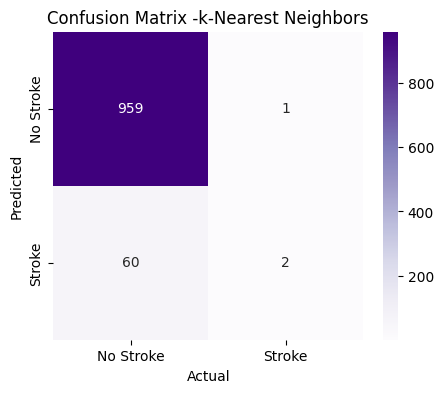

In [42]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Purples", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix -k-Nearest Neighbors')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Naïve Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
# Make predictions
nb_pred = nb_model.predict(X_test)
# Evaluate models
accuracy = accuracy_score(y_test, nb_pred)
classification_rep = classification_report(y_test, nb_pred)
confusion_mat = confusion_matrix(y_test, nb_pred)
print("Model:  Naïve Bayes")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")
print("-" * 75)

Model:  Naïve Bayes
Accuracy: 0.8747553816046967
Confusion Matrix:
[[867  93]
 [ 35  27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       960
           1       0.23      0.44      0.30        62

    accuracy                           0.87      1022
   macro avg       0.59      0.67      0.61      1022
weighted avg       0.92      0.87      0.89      1022

---------------------------------------------------------------------------


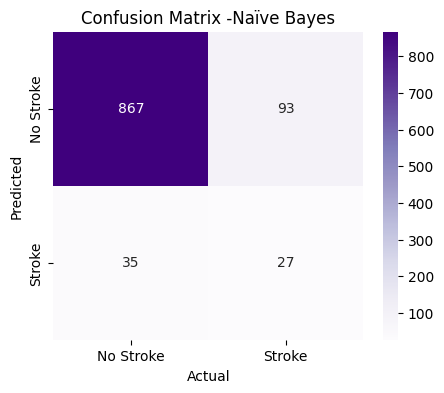

In [44]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Purples", xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title(f'Confusion Matrix -Naïve Bayes')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Based on previous Models we see that Logistic Regression and Support Vector Classifier are the best so we will choose Support Vector Classifier

In [54]:
X_train.head(1)

,age,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease
0,0.963343,0.265534,0.208477,1.0,1.0,0.75,0.0,0.333333,0.0,0.0


In [55]:
y_train.head(1)

802    0
Name: stroke, dtype: int64

## Build Pipeline For Model

In [53]:
from sklearn.pipeline import Pipeline
import joblib

# Create a pipeline with minmax scaler and Support Vector Classifier
svc_pipeline = Pipeline([
    # ('scaler', MinMaxScaler()),
    ('svc', SVC())
])

# Fit the pipeline on the entire dataset
svc_pipeline.fit(X_train, y_train)

# Save the SVC model to a .pkl file
joblib.dump(svc_pipeline, 'svc_model.pkl')

['svc_model.pkl']

## Use the Pipline

In [80]:
# Load the SVC model from the .pkl file
loaded_svc_model = joblib.load('svc_model.pkl')

# Example: Make predictions using the loaded model
example_data = X_train.head(1)  # Replace with your actual data or X_test.head(1)
predictions = loaded_svc_model.predict(example_data)

print("Example Predictions:", predictions)

Example Predictions: [0]


In [77]:
X_test.head(1)

,age,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease
0,0.377441,0.045515,0.190397,0.5,0.0,0.75,0.0,0.0,0.0,0.0


In [78]:
y_test.head(1)

4688    0
Name: stroke, dtype: int64

##<font color='Darker'>**Thanks A lot ^_^ 💓 🍷 💐**</font>